In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting(use_latex=True, pretty_print=False)

# Generalized coordinates

In [2]:
q1, q2, q3 = me.dynamicsymbols('q1, q2, q3')

# Generalized speeds

In [3]:
u1, u2, u3 = me.dynamicsymbols('u1, u2, u3')

# Specified Inputs

In [4]:
F, T = me.dynamicsymbols('F, T')

# Constants

In [5]:
k, c, ma, mb, mc, IB_bo, l, kT, g = sm.symbols('k, c, m_a, m_b, m_c, I_{B_bo}, l, k_T, g')
IB_bo

# Reference Frames

In [6]:
N = me.ReferenceFrame('N')

In [7]:
B = N.orientnew('B', 'Axis', (q2, N.z))

In [8]:
C = B.orientnew('C', 'Axis', (q3, N.z))

# Kinematic Differential Equations

$$
u_i = \dot{q}_i \\
0 = u_i - \dot{q}_i
$$


In [9]:
kdes = [u1 - q1.diff(),
        u2 - q2.diff(),
        u3 - q3.diff()]
kdes

# Angular Velocities

In [10]:
B.set_ang_vel(N, u2 * N.z)

In [11]:
C.set_ang_vel(B, u3 * N.z)

# Points

In [12]:
O = me.Point('O')

In [13]:
Pab = O.locatenew('P_{ab}', q1 * N.x)

In [14]:
Bo = Pab.locatenew('B_o', - 2 * l / 3 * B.y)

In [15]:
Pbc = Pab.locatenew('P_{bc}', -l * B.y)

In [16]:
Pc = Pbc.locatenew('P_c', -l * C.y)

In [17]:
Pc.pos_from(O)

# Linear Velocities

In [18]:
Pab.set_vel(N, u1 * N.x)

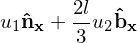

In [19]:
Bo.v2pt_theory(Pab, N, B)

In [20]:
Pbc.v2pt_theory(Pab, N, B)

In [21]:
Pc.v2pt_theory(Pbc, N, C)

# Partial Velocities

In [22]:
Pab.vel(N).diff(u1, N)

In [23]:
Pab.partial_velocity(N, u1)

In [24]:
Pab.partial_velocity(N, u1, u2, u3)

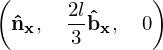

In [25]:
Bo.partial_velocity(N, u1, u2, u3)

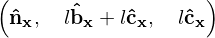

In [26]:
Pc.partial_velocity(N, u1, u2, u3)

In [27]:
B.partial_velocity(N, u1, u2, u3)

In [28]:
[B.ang_vel_in(N).diff(ur, N) for ur in [u1, u2, u3]]

# Angular Accelerations

In [29]:
alpha_B_N = B.ang_acc_in(N)
alpha_B_N

In [30]:
a_Pab_N = Pab.acc(N)
a_Pab_N

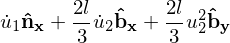

In [31]:
a_Bo_N = Bo.acc(N)
a_Bo_N

In [32]:
a_Pc_N = Pc.acc(N)
a_Pc_N

# Loads (forces and torques)

In [33]:
Rab = (F - k * q1 - c * u1) * N.x
Rab

In [34]:
Rbo = -(mb * g) * N.y
Rbo

In [35]:
Rc = -(mc * g) * N.y
Rc

In [36]:
TB = (T + kT * q3) * N.z
TB

# Mass and Inertia

In [37]:
IB = me.inertia(B, 0, 0, IB_bo)
IB

In [38]:
ma, mc

# Particles and Bodies

In [39]:
slider = me.Particle('slider', Pab, ma)
bob = me.Particle('bob', Pc, mc)

In [40]:
pend = me.RigidBody('pend', Bo, B, mb, (IB, Bo))

In [41]:
bodies = [slider, bob, pend]

# Loads (forces and torques)

In [42]:
loads = [(Pab, Rab),
         (Pc, Rc),
         (Bo, Rbo),
         (B, TB)]

In [43]:
q = sm.Matrix([q1, q2, q3])
u = sm.Matrix([u1, u2, u3])

In [44]:
kane = me.KanesMethod(N, q, u, kd_eqs=kdes)

In [45]:
Fr, Frstar = kane.kanes_equations(bodies, loads)

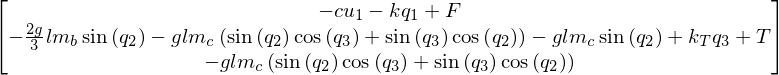

In [46]:
Fr

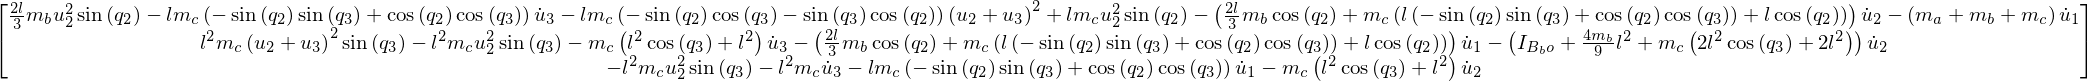

In [47]:
Frstar

In [48]:
f = Fr + Frstar

In [49]:
me.find_dynamicsymbols(f)

In [50]:
v0 = sm.zeros(9, 1)
v0

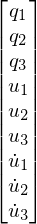

In [51]:
v = sm.Matrix([q1, q2, q3, u1, u2, u3, u1.diff(), u2.diff(), u3.diff()])
v

In [53]:
q = sm.Matrix([q1, q2, q3])
u = sm.Matrix([u1, u2, u3])

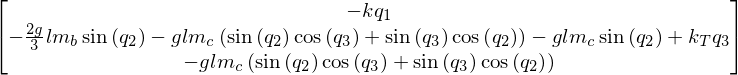

In [62]:
f_static = f.subs({u1.diff(): 0, u2.diff(): 0, u3.diff(): 0}).\
             subs({u1: 0, u2: 0, u3: 0}).\
             subs({F: 0, T: 0})
f_static

In [64]:
f_static.subs({q1: 0, q2: sm.pi, q3: 0})

In [65]:
v_subs = dict(zip(v, v0))
v_subs

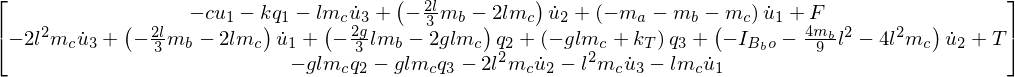

In [68]:
f_lin = f.subs(v_subs) + f.jacobian(v).subs(v_subs) * (v - v0)
sm.trigsimp(f_lin)

In [73]:
f_lin[0, 0].expand().coeff(u1.diff())

In [74]:
f_lin[0, 0].diff(u1.diff())

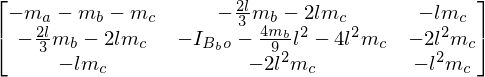

In [76]:
M = f_lin.jacobian(u.diff())
M

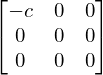

In [77]:
C = f_lin.jacobian(u)
C

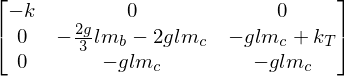

In [78]:
K = f_lin.jacobian(q)
K

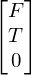

In [79]:
F = f_lin - M * u.diff() - C * u - K * q
F

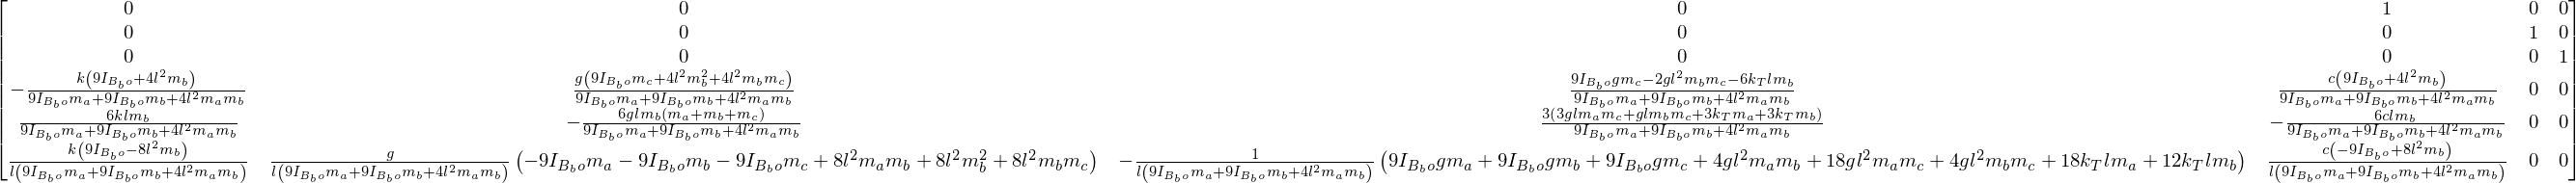

In [82]:
A = sm.zeros(3, 3).row_join(sm.eye(3)).col_join(-M.LUsolve(K).row_join(-M.LUsolve(C)))
sm.simplify(A)

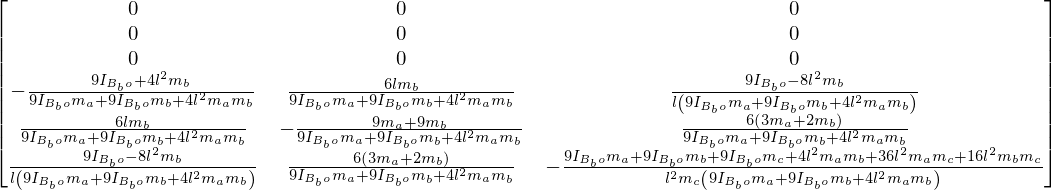

In [84]:
B = sm.zeros(3, 3).col_join(M.inv())
sm.simplify(B)

In [86]:
A, B, r = kane.linearize(A_and_B=True, op_point={q1: 0, q2: 0, q3: 0, u1: 0, u2: 0, u3: 0})

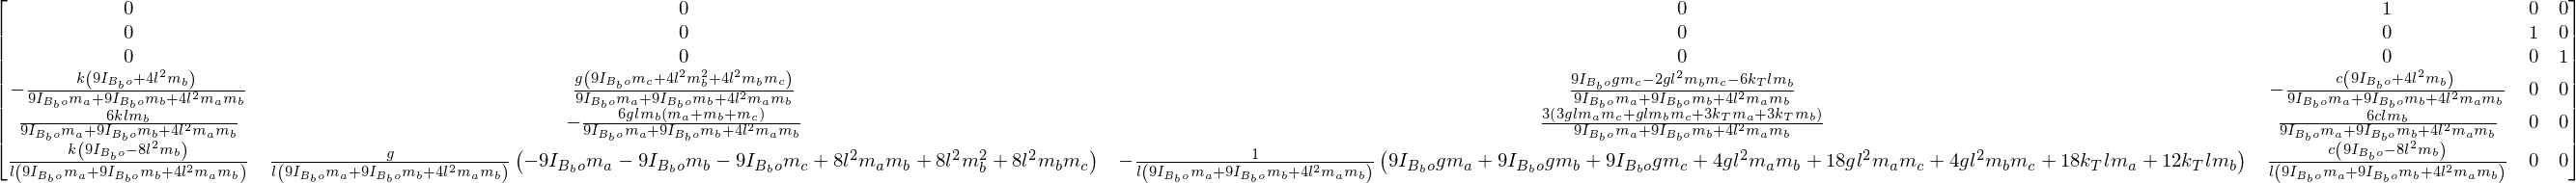

In [87]:
sm.simplify(A)

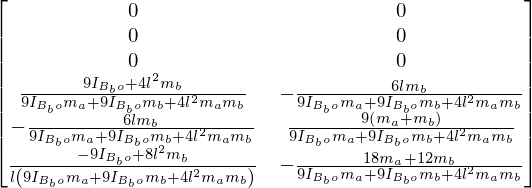

In [88]:
sm.simplify(B)